In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd

In [2]:
from jupyterworkflow.data import get_fremont_data

In [3]:
data = get_fremont_data()

In [4]:
data.head()

,West,East,Total
Date,,,
2019-01-31 23:00:00,7.0,6.0,13.0
2019-01-31 22:00:00,13.0,16.0,29.0
2019-01-31 21:00:00,18.0,27.0,45.0
2019-01-31 20:00:00,32.0,33.0,65.0
2019-01-31 19:00:00,40.0,94.0,134.0


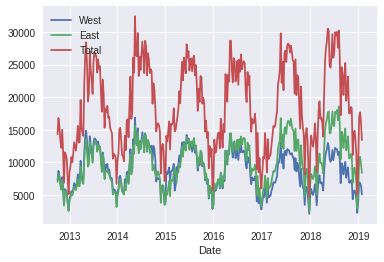

In [5]:
data.resample('W').sum().plot()

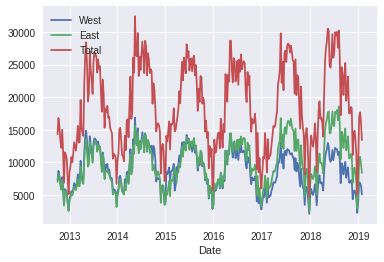

In [6]:
data.resample('W').sum().plot()

(0, 1098983.95)

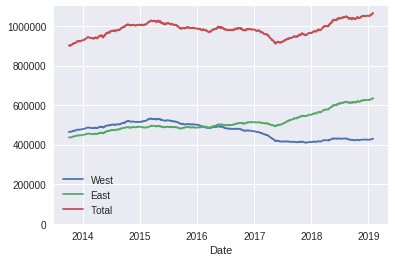

In [7]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

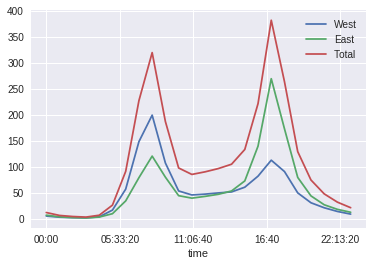

In [8]:
data.groupby(data.index.time).mean().plot()

In [9]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


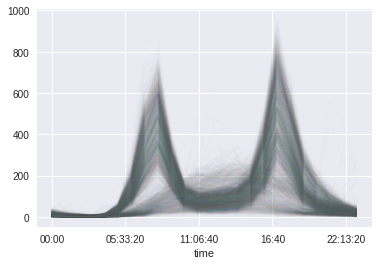

In [10]:
pivoted.plot(legend=False, alpha=0.01)

In [17]:
X = pivoted.fillna(0).T.values
X.shape

(2312, 24)

In [26]:
from sklearn.decomposition import PCA
X2 = PCA(2).fit_transform(X)

array([[315.2203596 ,  -7.99505801],
       [237.93564675,  35.97697867],
       [136.76939194,  41.82867671],
       ...,
       [350.57560277, -27.38971187],
       [268.3456981 , -63.23920577],
       [228.65224323, -41.51515664]])

In [27]:
X2.shape

(2312, 2)

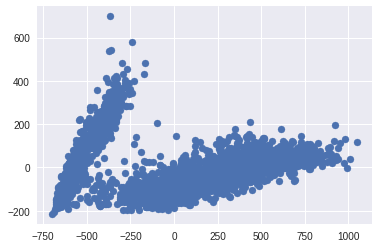

In [28]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0],X2[:, 1])

In [30]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 0, 0])

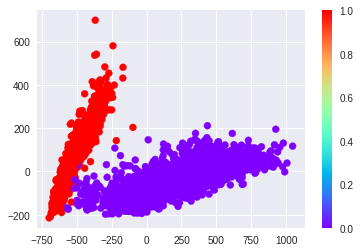

In [32]:
plt.scatter(X2[:, 0],X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

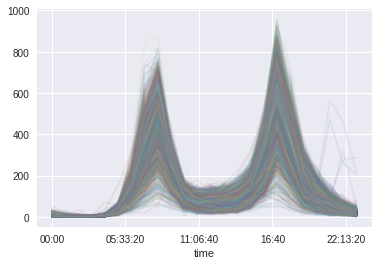

In [35]:
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1)

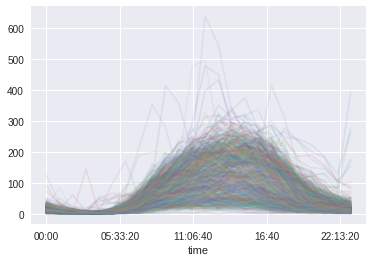

In [36]:
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1)

In [45]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

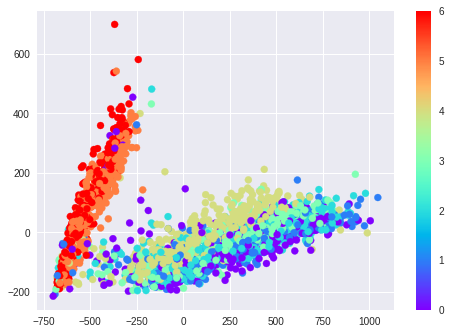

In [46]:
plt.scatter(X2[:, 0],X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [47]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

NameError: name 'label' is not defined